## CLASSIFICATION OF WEB PAGES

In [4]:
import numpy as np
import pandas as pd
import json #encodes python objects as JSON strings
import matplotlib.pyplot as plt #python visualization library
import seaborn as sns #python visualization library
from nltk.corpus import stopwords #nltk package to remove the stopwords from the text
import nltk
#nltk.download()

from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier #imported to use decision tree classifer
from sklearn.ensemble import RandomForestClassifier #imported to use decision tree classifer
from sklearn.model_selection import train_test_split #Spliting arrays or matrices into random train and test subsets
from sklearn.cross_validation import cross_val_score # In case of k-fold cross validation, it is used to evaluate a score by cross-validation
from sklearn.metrics import accuracy_score #Accuracy classification score tells how good a model is working 

## Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('C:/Users/mahak/OneDrive/Documents/Winter Term/Big Data Analytics/Project/New folder/train.csv')

In [6]:
df.columns.unique()

Index(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label'],
      dtype='object')

In [7]:
#Segregating the title and body part from the boilerplate
df['title'] = df.boilerplate.map(lambda x: json.loads(x).get('title', ''))
df['body'] = df.boilerplate.map(lambda x: json.loads(x).get('body', ''))


In [8]:
df.head()#displays the top five rows of the dataset

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 29 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_r

In [10]:
#Counting the number of labels marked as evergreen and non-evergreen

temp1 = pd.DataFrame(df.label.value_counts())
temp1.reset_index(inplace=True)
temp1.columns = ['label','count']
temp1

,label,count
0,1,3796
1,0,3599


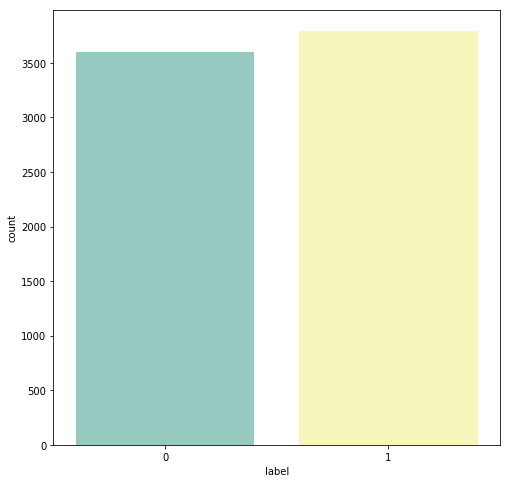

In [11]:
#Countplot visualization to check the amount evergreen and non-evergreen web pages present in the dataset
plt.subplots(figsize=(8,8))
sns.countplot(x="label", data=df, palette="Set3")
plt.show()

In [12]:
df.isnull().sum() #checking for the missing values

url                                0
urlid                              0
boilerplate                        0
alchemy_category                   0
alchemy_category_score             0
avglinksize                        0
commonlinkratio_1                  0
commonlinkratio_2                  0
commonlinkratio_3                  0
commonlinkratio_4                  0
compression_ratio                  0
embed_ratio                        0
framebased                         0
frameTagRatio                      0
hasDomainLink                      0
html_ratio                         0
image_ratio                        0
is_news                            0
lengthyLinkDomain                  0
linkwordscore                      0
news_front_page                    0
non_markup_alphanum_characters     0
numberOfLinks                      0
numwords_in_url                    0
parametrizedLinkRatio              0
spelling_errors_ratio              0
label                              0
t

In [13]:
(df.astype(str) == '?').any(1) # values having "?" in the rows

0       False
1       False
2       False
3       False
4       False
5        True
6       False
7        True
8        True
9        True
10      False
11       True
12      False
13       True
14       True
15       True
16      False
17      False
18      False
19      False
20      False
21       True
22       True
23       True
24       True
25      False
26      False
27       True
28       True
29       True
        ...  
7365     True
7366     True
7367     True
7368     True
7369     True
7370     True
7371     True
7372    False
7373    False
7374    False
7375    False
7376     True
7377    False
7378     True
7379    False
7380     True
7381     True
7382    False
7383    False
7384     True
7385     True
7386     True
7387    False
7388    False
7389     True
7390    False
7391    False
7392     True
7393    False
7394     True
Length: 7395, dtype: bool

In [14]:
df_new=df[~(df.astype(str) == '?').any(1)] #dropping those rows having "?" as the value

In [15]:
len(df_new) # reduced to 3566 rows having same number of columns

3566

In [19]:
a=df_new.groupby(['alchemy_category'],as_index=False)[['label']].mean() #checking which category has highest number of evergreen labels
a

,alchemy_category,label
0,arts_entertainment,0.387870
1,business,0.719269
2,computer_internet,0.218182
3,culture_politics,0.466942
4,gaming,0.387755
5,health,0.575581
6,law_crime,0.428571
7,recreation,0.695018
8,religion,0.500000
9,science_technology,0.446512


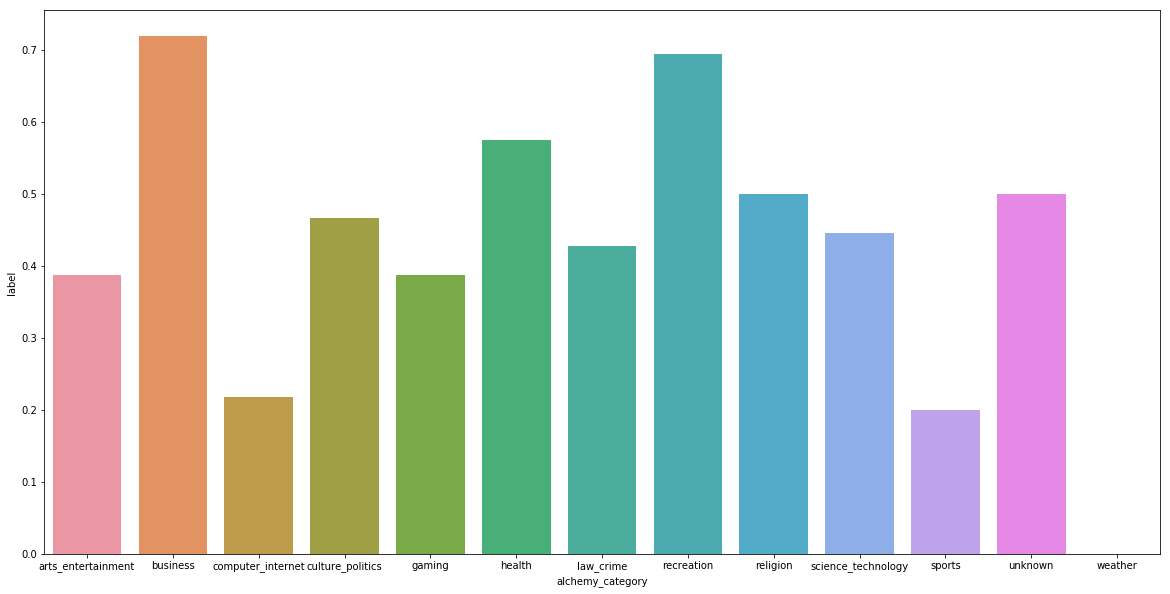

In [20]:
#barplot showing which alchemy category has highest number of evergreen labels, which is buisness
#Under buisness category, there are many webpages related to recipes, which can be considered as evergreen webpages
plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(x='alchemy_category', y='label', data=a)
plt.show()

In [21]:
#Need to check whether the title containing recipe, fashion,sports and news is having highest number of evergreen websites or not.

df_new['recipe'] = df_new['title'].map(lambda t: 1 if 'recipe' in str(t).lower() else 0)
df_new['fashion'] = df_new['title'].map(lambda t: 1 if 'fashion' in str(t).lower() else 0)
df_new['sports'] = df_new['title'].map(lambda t: 1 if 'sports' in str(t).lower() else 0)
df_new['news'] = df_new['title'].map(lambda t: 1 if 'news' in str(t).lower() else 0)


In [22]:
#According to the provided dataset, the highest count of evergreen pages having recipe in their title are 360.

temp_recipe = pd.DataFrame(df_new['recipe'].value_counts())
temp_recipe.reset_index(inplace=True)
temp_recipe

#count of websites having recipes as their content are mostly non-evergreen(highest count of 3206), 
#which means that they do not last long.
#0 indicates non-evergreen
#1 indicates evergreen

,index,recipe
0,0,3206
1,1,360


In [23]:
#According to the provided dataset, the highest count of evergreen pages having fashion in their title are 7202.
fashion = pd.DataFrame(df_new['fashion'].value_counts())
fashion.reset_index(inplace=True)
fashion

,index,fashion
0,0,3463
1,1,103


In [24]:
sports = pd.DataFrame(df_new['sports'].value_counts())
sports.reset_index(inplace=True)
sports

,index,sports
0,0,3466
1,1,100


In [25]:
news = pd.DataFrame(df_new['news'].value_counts())
news.reset_index(inplace=True)
news

,index,news
0,0,3440
1,1,126


The webpages of food-recipes, fashion and sports are having least number of evergreen labels. It can be considered true as the sports score keeps on changing after every match. Similarly, the recipes are seasonal , they keep on changing and so as the fashion style. It changes every season and so is the website content.

Different alchemy categories have been studied.

In [26]:
#package for stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
import warnings
warnings.filterwarnings("ignore")

In [27]:
d=df_new.drop('recipe',axis=1)

In [28]:
e=d.drop('fashion', axis=1)


In [29]:
dt=e.drop('sports', axis=1)
dt=e.drop('news', axis=1)

In [30]:
dt=dt.drop('url', axis=1)

In [31]:
dt=dt.drop('boilerplate', axis=1)

In [32]:
#one-hot encoding
alch_dummies=pd.get_dummies(dt.alchemy_category)
alch_dummies.head()

,arts_entertainment,business,computer_internet,culture_politics,gaming,health,law_crime,recreation,religion,science_technology,sports,unknown,weather
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
# Concatating the above formatted data with the real dataset
dt_concat=pd.concat([dt,alch_dummies],axis=1)
dt_concat.head()

,urlid,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,...,culture_politics,gaming,health,law_crime,recreation,religion,science_technology,sports,unknown,weather
0,4042,business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,...,0,0,0,0,0,0,0,0,0,0
1,8471,recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,...,0,0,0,0,1,0,0,0,0,0
2,1164,health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,...,0,0,1,0,0,0,0,0,0,0
3,6684,health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,...,0,0,1,0,0,0,0,0,0,0
4,9006,sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
dt_concat.drop('alchemy_category', 1).head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,...,culture_politics,gaming,health,law_crime,recreation,religion,science_technology,sports,unknown,weather
0,4042,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,8471,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,...,0,0,0,0,1,0,0,0,0,0
2,1164,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,...,0,0,1,0,0,0,0,0,0,0
3,6684,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,...,0,0,1,0,0,0,0,0,0,0
4,9006,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
dt_concat.isnull().sum()#checking for missing values

urlid                              0
alchemy_category                   0
alchemy_category_score             0
avglinksize                        0
commonlinkratio_1                  0
commonlinkratio_2                  0
commonlinkratio_3                  0
commonlinkratio_4                  0
compression_ratio                  0
embed_ratio                        0
framebased                         0
frameTagRatio                      0
hasDomainLink                      0
html_ratio                         0
image_ratio                        0
is_news                            0
lengthyLinkDomain                  0
linkwordscore                      0
news_front_page                    0
non_markup_alphanum_characters     0
numberOfLinks                      0
numwords_in_url                    0
parametrizedLinkRatio              0
spelling_errors_ratio              0
label                              0
title                              5
body                              24
s

In [36]:
dt_concat['title']

0       IBM Sees Holographic Calls Air Breathing Batte...
1       The Fully Electronic Futuristic Starting Gun T...
2       Fruits that Fight the Flu fruits that fight th...
3                     10 Foolproof Tips for Better Sleep 
4       The 50 Coolest Jerseys You Didn t Know Existed...
6                       fashion lane American Wild Child 
10      Business Financial News Breaking US Internatio...
12                         9 Foods That Trash Your Teeth 
16                    Liquid Mountaineering The Awesomer 
17                                                   None
18                          Grilled Peaches Sugarcrafter 
19      How to Make Your Home Healthier A Room by Room...
20      Olympic Soccer Babe Alex Morgan Medal Winning ...
25       Best College Football Fan Sign Ever Alabama Fan 
26                                    Breaking News Blog 
31         Whole Wheat Chocolate Chai Muffins Savvy Eats 
34      Chocolate Bread Pudding with Walnuts and Choco...
37            

In [37]:
#replacing the missing text with some string
dt_concat['title'] = dt_concat.title.apply(lambda x: x if not pd.isnull(x) else 'IsNull')


In [38]:
dt_concat['body'] = dt_concat.body.apply(lambda x: x if not pd.isnull(x) else 'IsNull')

In [39]:
dt_concat.isnull().sum()

urlid                             0
alchemy_category                  0
alchemy_category_score            0
avglinksize                       0
commonlinkratio_1                 0
commonlinkratio_2                 0
commonlinkratio_3                 0
commonlinkratio_4                 0
compression_ratio                 0
embed_ratio                       0
framebased                        0
frameTagRatio                     0
hasDomainLink                     0
html_ratio                        0
image_ratio                       0
is_news                           0
lengthyLinkDomain                 0
linkwordscore                     0
news_front_page                   0
non_markup_alphanum_characters    0
numberOfLinks                     0
numwords_in_url                   0
parametrizedLinkRatio             0
spelling_errors_ratio             0
label                             0
title                             0
body                              0
sports                      

In [40]:
dt_concat.head()

,urlid,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,...,culture_politics,gaming,health,law_crime,recreation,religion,science_technology,sports,unknown,weather
0,4042,business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,...,0,0,0,0,0,0,0,0,0,0
1,8471,recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,...,0,0,0,0,1,0,0,0,0,0
2,1164,health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,...,0,0,1,0,0,0,0,0,0,0
3,6684,health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,...,0,0,1,0,0,0,0,0,0,0
4,9006,sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
#converting the text column to lowercase
dt_concat.body = dt_concat.body.apply(lambda x: x.lower())
dt_concat['body'].head()

0    a sign stands outside the international busine...
1    and that can be carried on a plane without the...
2    apples the most popular source of antioxidants...
3    there was a period in my life when i had a lot...
4    jersey sales is a curious business whether you...
Name: body, dtype: object

In [42]:
#converting the text column to lowercase
dt_concat.title = dt_concat.title.apply(lambda x: x.lower())
dt_concat['title'].head()

0    ibm sees holographic calls air breathing batte...
1    the fully electronic futuristic starting gun t...
2    fruits that fight the flu fruits that fight th...
3                  10 foolproof tips for better sleep 
4    the 50 coolest jerseys you didn t know existed...
Name: title, dtype: object

In [43]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text


In [44]:
#removed punctuations from the text
dt_concat['body']=dt_concat['body'].apply(remove_punctuations)
dt_concat['body'].head()

0    a sign stands outside the international busine...
1    and that can be carried on a plane without the...
2    apples the most popular source of antioxidants...
3    there was a period in my life when i had a lot...
4    jersey sales is a curious business whether you...
Name: body, dtype: object

In [45]:
#removed punctuations from the text
dt_concat['title']=dt_concat['title'].apply(remove_punctuations)
dt_concat['title'].tail()

7387                       vintage funk a chic direction 
7388    new york best place to watch wildlife jamaica ...
7390    kno raises 46 million more to build most power...
7391                                  why i miss college 
7393                                      naturally ella 
Name: title, dtype: object

In [46]:
#removed the digits with empty string
dt_concat.body = dt_concat.body.str.replace('\d+', '')
dt_concat.body.tail()

7387    leave a reply cancel reply your email address ...
7388    best place to watch wildlife  jamaica bay wild...
7390    marc andreessen is normally enthusiastic about...
7391    mar   i d like to congratulate jane on having ...
7393                                                     
Name: body, dtype: object

In [47]:
#removed the digits with empty string
dt_concat.title = dt_concat.title.str.replace('\d+', '')
dt_concat.title.tail()

7387                       vintage funk a chic direction 
7388    new york best place to watch wildlife jamaica ...
7390    kno raises  million more to build most powerfu...
7391                                  why i miss college 
7393                                      naturally ella 
Name: title, dtype: object

In [48]:
#remove stopwords from the body column
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
stop=set(stopwords.words('English'))

dt_concat['text']=dt_concat['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dt_concat['text'].tail()

7387    leave reply cancel reply email address publish...
7388    best place watch wildlife jamaica bay wildlife...
7390    marc andreessen normally enthusiastic startups...
7391    mar like congratulate jane believe best body d...
7393                                                     
Name: text, dtype: object

In [49]:
dt_concat['title_col']=dt_concat['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dt_concat['title_col'].tail()

7387                          vintage funk chic direction
7388    new york best place watch wildlife jamaica bay...
7390    kno raises million build powerful tablet anyon...
7391                                         miss college
7393                                       naturally ella
Name: title_col, dtype: object

In [50]:
dt_concat.columns

Index(['urlid', 'alchemy_category', 'alchemy_category_score', 'avglinksize',
       'commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3',
       'commonlinkratio_4', 'compression_ratio', 'embed_ratio', 'framebased',
       'frameTagRatio', 'hasDomainLink', 'html_ratio', 'image_ratio',
       'is_news', 'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label', 'title',
       'body', 'sports', 'arts_entertainment', 'business', 'computer_internet',
       'culture_politics', 'gaming', 'health', 'law_crime', 'recreation',
       'religion', 'science_technology', 'sports', 'unknown', 'weather',
       'text', 'title_col'],
      dtype='object')

In [51]:
dtb=dt_concat.drop('body', axis=1)
data=dtb.drop('title', axis=1)
data=data.drop('alchemy_category', axis=1)
data.columns

Index(['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label', 'sports',
       'arts_entertainment', 'business', 'computer_internet',
       'culture_politics', 'gaming', 'health', 'law_crime', 'recreation',
       'religion', 'science_technology', 'sports', 'unknown', 'weather',
       'text', 'title_col'],
      dtype='object')

In [52]:
#for the column body

from sklearn.feature_extraction.text import TfidfVectorizer

text_data=data['text']

# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)

# Show tf-idf feature matrix
feature_matrix.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [53]:
#for the column title
from sklearn.feature_extraction.text import TfidfVectorizer

text_data1=data['title_col']
# Create the tf-idf feature matrix
tfidf1 = TfidfVectorizer()
feature_matrix1 = tfidf1.fit_transform(text_data1)

# Show tf-idf feature matrix
feature_matrix1.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [54]:
# Show tf-idf feature matrix for body column
k=tfidf.get_feature_names()

In [55]:
# Show tf-idf feature matrix for title column
k1=tfidf1.get_feature_names()

In [56]:
# Create data frame
tfd=pd.DataFrame(feature_matrix.toarray(), columns=tfidf.get_feature_names())
print(tfd.shape)

(3566, 56292)


In [57]:
# Create data frame
tfd_title=pd.DataFrame(feature_matrix1.toarray(), columns=tfidf1.get_feature_names())
print(tfd_title.shape)

(3566, 7062)


In [58]:
tfd.columns.unique()# unique values in tf-idf vectors

Index(['aa', 'aaa', 'aaaaah', 'aaaaahhhhh', 'aaaah', 'aaaahs', 'aaas', 'aaaw',
       'aac', 'aalltop',
       ...
       '⁰f', '宜しくお願いいたします', '宫宝鸡丁', '山椒', '新じゃが', '日本の顧客を大歓迎します', '烘焙烹饪饮食博客',
       '申し訳ございませんが', 'ｅｔｓｙショップに新商品をを追加することにします',
       'ｅｔｓｙストアにペイパル以外の決済方法は受け付けません'],
      dtype='object', length=56292)

In [59]:
tfd_title.columns.unique()# unique values in tf-idf vectors

Index(['abashiri', 'abbey', 'abc', 'abcnews', 'abdominal', 'abercrombie',
       'ability', 'aboobaker', 'about', 'abrams',
       ...
       'ziti', 'zombie', 'zone', 'zoom', 'zorb', 'zubin', 'zucchini',
       'zuckerberg', 'zupfkuchen', 'zuza'],
      dtype='object', length=7062)

In [60]:
tfd_title.head()

,abashiri,abbey,abc,abcnews,abdominal,abercrombie,ability,aboobaker,about,abrams,...,ziti,zombie,zone,zoom,zorb,zubin,zucchini,zuckerberg,zupfkuchen,zuza
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Applied on Text Attributes

## **Logistic Regression on the title part of the Boilerplate Column**

In [61]:
y=data['label']
x=tfd_title

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [63]:
#Logistic on the title column-tf-idf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

data_lr = LogisticRegression()
data_lr.fit(X_train, y_train)
pred_lr = data_lr.predict(X_test)
print("Accuracy ", accuracy_score(np.array(y_test),pred_lr))

Accuracy  0.791588785047


In [64]:
from sklearn import model_selection
scores_nb = cross_val_score(estimator= data_lr,X= X_train,y = y_train,scoring = "accuracy",cv=10)   # Cross validation folds(k number of folds)

print("Average accuracy: ", scores_nb.mean())

Average accuracy:  0.780072289157


## **Logistic Regression on the Body part of the Boilerplate Column**

In [65]:
y1=data['label']
x1=tfd

In [66]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.7)

In [67]:
#Logistic on the body column-tf-idf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

data_lr1 = LogisticRegression()
data_lr1.fit(X_train1, y_train1)
pred_lr1 = data_lr1.predict(X_test1)
print("Accuracy ", accuracy_score(np.array(y_test1),pred_lr1))

Accuracy  0.820584701642


In [68]:
from sklearn import model_selection
scores_nb = cross_val_score(estimator= data_lr1,X= X_train1,y = y_train1,scoring = "accuracy",cv=10)   # Cross validation folds(k number of folds)

print("Average accuracy: ", scores_nb.mean())

Average accuracy:  0.797867970245


## Multinomial Naive Bayes Classifier on the title part of the Boilerplate Column

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
#instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)

metrics.accuracy_score(y_test, y_pred_class)

0.78504672897196259

In [71]:
from sklearn import model_selection
scores_nb = cross_val_score(estimator= nb,X= X_train,y = y_train,scoring = "accuracy",cv=10)   # Cross validation folds(k number of folds)

print("Average accuracy: ", scores_nb.mean())

Average accuracy:  0.766036947791


## Multinomial Naive Bayes Classifier on the body part of the Boilerplate Column

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
#instantiate a Multinomial Naive Bayes model
nb1 = MultinomialNB()
nb1.fit(X_train1, y_train1)
y_pred_class1 = nb1.predict(X_test1)

metrics.accuracy_score(y_test1, y_pred_class1)

0.75851021225470561

In [73]:
from sklearn import model_selection
scores_nb = cross_val_score(estimator= nb1,X= X_train1,y = y_train1,scoring = "accuracy",cv=10)   # Cross validation folds(k number of folds)

print("Average accuracy: ", scores_nb.mean())

Average accuracy:  0.763244120509


## Model on the Available features

In [74]:
data.columns.unique()

Index(['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label', 'sports',
       'arts_entertainment', 'business', 'computer_internet',
       'culture_politics', 'gaming', 'health', 'law_crime', 'recreation',
       'religion', 'science_technology', 'unknown', 'weather', 'text',
       'title_col'],
      dtype='object')

In [75]:
dat=data.drop('text', axis=1)
dat1=dat.drop('title_col', axis=1)

In [76]:
dat1.columns.unique()

Index(['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label', 'sports',
       'arts_entertainment', 'business', 'computer_internet',
       'culture_politics', 'gaming', 'health', 'law_crime', 'recreation',
       'religion', 'science_technology', 'unknown', 'weather'],
      dtype='object')

## Decision Tree Classifier

In [77]:
X2 = dat1[['image_ratio', 'embed_ratio','html_ratio','label']].dropna()
y2 = X2['label']
X2.drop('label', axis=1, inplace=True)

In [78]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

In [79]:
#Building Decision tree model 

data_DTC=DecisionTreeClassifier()
data_DTC.fit(X_train2,y_train2)
prediction_DTC = data_DTC.predict(X_test2)
print("Accuracy ", accuracy_score(np.array(y_test2),prediction_DTC))


Accuracy  0.555140186916


In [80]:
# Cross validation folds(k number of folds)
scores_dt = cross_val_score(estimator= data_DTC,X= X_train2,y = y_train2,scoring = "accuracy", cv=10)   
print("Average accuracy: ", scores_dt.mean())

Average accuracy:  0.520849831197


## Random Forest Classifier

In [81]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size=0.3)

In [82]:
data_rf=RandomForestClassifier()
data_rf.fit(X_train3,y_train3)
pred_rf=data_rf.predict(X_test3)
print("Accuracy ", accuracy_score(np.array(y_test3),pred_rf))

Accuracy  0.535514018692


In [83]:
# Cross validation folds(k number of folds)
scores = cross_val_score(estimator= data_rf,X= X_train3,y = y_train3,scoring = "accuracy", cv=10)   
print("Average accuracy: ", scores.mean())

Average accuracy:  0.543693364694


## Logistic Regression Classifier

In [84]:
data_lr = LogisticRegression()
data_lr.fit(X_train3, y_train3)
pred_lr = data_lr.predict(X_test3)
print("Accuracy ", accuracy_score(np.array(y_test3),pred_lr))

Accuracy  0.532710280374


In [85]:
from sklearn import model_selection
scores_lg = cross_val_score(estimator= data_lr,X= X_train3,y = y_train3,scoring = "accuracy",cv=10)   # Cross validation folds(k number of folds)

print("Average accuracy: ", scores_lg.mean())

Average accuracy:  0.548069460311


## Support Vector Machines

In [86]:
#SVM
from sklearn.svm import SVC
data_svm = SVC(kernel='linear',random_state=0)
data_svm.fit(X_train3, y_train3)
prediction_svm = data_svm.predict(X_test3)
print("Accuracy ", accuracy_score(np.array(y_test3),prediction_svm))

Accuracy  0.509345794393


In [87]:
from sklearn import model_selection
scores_sv = cross_val_score(estimator= data_svm,X= X_train3,y = y_train3,scoring = "accuracy",cv=10)   # Cross validation folds(k number of folds)

print("Average accuracy: ", scores_sv.mean())

Average accuracy:  0.538058087329


## Naive Bayes Classifier

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
#instantiate a Multinomial Naive Bayes model
nb2 = GaussianNB()
nb2.fit(X_train3, y_train3)
y_pred_class3 = nb2.predict(X_test3)

metrics.accuracy_score(y_test3, y_pred_class3)

0.51028037383177571

In [90]:
from sklearn import model_selection
scores_nb = cross_val_score(estimator= nb2,X= X_train3,y = y_train3,scoring = "accuracy",cv=10)   # Cross validation folds(k number of folds)

print("Average accuracy: ", scores_nb.mean())

Average accuracy:  0.543656544905
